In [1]:
import os
import sys

In [2]:
os.environ["PYSPARK_PYTHON"]="C:\Spark\spark-3.3.2-bin-hadoop2\python"
os.environ["JAVA_HOME"] = "C:\Program Files\Java\jdk-18.0.2.1"
os.environ["SPARK_HOME"] = "C:\Spark\spark-3.3.2-bin-hadoop2"
os.environ["PYLIB"] = os.environ["SPARK_HOME"] + "/python/lib"
sys.path.insert(0, os.environ["PYLIB"] + "/py4j-0.10.9.5-src.zip")
sys.path.insert(0, os.environ["PYLIB"] + "/pyspark.zip") 

In [3]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("r_model").getOrCreate()
spark

In [4]:
# importing pandas
import pandas as pd

pd.set_option('display.max_columns', None)

In [5]:
cluster_data = spark.read.option("header","true").csv("../data/EDA/final_data_for_modelling.csv")
cluster_data.printSchema()
cluster_data = cluster_data.drop("_c0")
cluster_data.printSchema()

root
 |-- _c0: string (nullable = true)
 |-- age_imputed: string (nullable = true)
 |-- bg2_lactate_imputed: string (nullable = true)
 |-- basophils_imputed: string (nullable = true)
 |-- eosinophils_imputed: string (nullable = true)
 |-- lymphocytes_imputed: string (nullable = true)
 |-- monocytes_imputed: string (nullable = true)
 |-- neutrophils_imputed: string (nullable = true)
 |-- albumin_imputed: string (nullable = true)
 |-- aniongap_imputed: string (nullable = true)
 |-- bicarbonate_imputed: string (nullable = true)
 |-- bun_imputed: string (nullable = true)
 |-- calcium_imputed: string (nullable = true)
 |-- chloride_imputed: string (nullable = true)
 |-- creatinine_imputed: string (nullable = true)
 |-- glucose_imputed: string (nullable = true)
 |-- sodium_imputed: string (nullable = true)
 |-- potassium_imputed: string (nullable = true)
 |-- inr_imputed: string (nullable = true)
 |-- pt_imputed: string (nullable = true)
 |-- ptt_imputed: string (nullable = true)
 |-- hemato

In [6]:
print(cluster_data.count())

63887


In [7]:
# convert all values to double
import pyspark.sql.functions as F
print(cluster_data.printSchema())
numeric_cols = cluster_data.columns
numeric_cols.remove("gender")
cluster_data = cluster_data.select(*(F.round(F.col(c).cast("double"), 2).alias(c) for c in numeric_cols), "gender")
print(cluster_data.printSchema())

root
 |-- age_imputed: string (nullable = true)
 |-- bg2_lactate_imputed: string (nullable = true)
 |-- basophils_imputed: string (nullable = true)
 |-- eosinophils_imputed: string (nullable = true)
 |-- lymphocytes_imputed: string (nullable = true)
 |-- monocytes_imputed: string (nullable = true)
 |-- neutrophils_imputed: string (nullable = true)
 |-- albumin_imputed: string (nullable = true)
 |-- aniongap_imputed: string (nullable = true)
 |-- bicarbonate_imputed: string (nullable = true)
 |-- bun_imputed: string (nullable = true)
 |-- calcium_imputed: string (nullable = true)
 |-- chloride_imputed: string (nullable = true)
 |-- creatinine_imputed: string (nullable = true)
 |-- glucose_imputed: string (nullable = true)
 |-- sodium_imputed: string (nullable = true)
 |-- potassium_imputed: string (nullable = true)
 |-- inr_imputed: string (nullable = true)
 |-- pt_imputed: string (nullable = true)
 |-- ptt_imputed: string (nullable = true)
 |-- hematocrit_imputed: string (nullable = tr

In [8]:
cluster_data.describe().toPandas()

,summary,age_imputed,bg2_lactate_imputed,basophils_imputed,eosinophils_imputed,lymphocytes_imputed,monocytes_imputed,neutrophils_imputed,albumin_imputed,aniongap_imputed,bicarbonate_imputed,bun_imputed,calcium_imputed,chloride_imputed,creatinine_imputed,glucose_imputed,sodium_imputed,potassium_imputed,inr_imputed,pt_imputed,ptt_imputed,hematocrit_imputed,hemoglobin_imputed,mch_imputed,mchc_imputed,mcv_imputed,platelet_imputed,rbc_imputed,rdw_imputed,wbc_imputed,scr_min_imputed,ckd_imputed,mdrd_est_imputed,scr_baseline_imputed,alt_imputed,alp_imputed,ast_imputed,bilirubin_total_imputed,charlson_comorbidity_index_imputed,gender
0,count,63887,63887,63887,63887,63887,63887,63887,63887,63887,63887,63887,63887,63887,63887,63887,63887,63887,63887,63887,63887,63887,63887,63887,63887,63887,63887,63887,63887,63887,63887,63887,63887,63887,63887,63887,63887,63887,63887,63887
1,mean,56.82400472709635,1.6618992909350772,0.41085979933311007,1.4472944417484328,20.265802119371077,6.036700737237932,72.54882370435301,3.87397749150817,14.322600842111854,26.913957456133485,15.669588492181507,8.975599104669197,104.77735689576909,0.8803982030773086,123.04590918340195,140.30140717203813,4.2118255670167315,1.131154381955504,12.685094463662445,29.783426988275597,37.57769029693053,12.582841579664079,30.44813811886616,33.90112385931408,90.68909793854776,245.37486499600857,4.175787405888535,13.6252257892843,9.807813170128496,0.8803982030773086,0.0,0.9607652574076508,0.8558993222408364,22.720741308873478,73.12986992658914,25.52693036141938,0.5236746129885502,2.7256405841564013,None
2,stddev,19.28094185711831,0.4508023009295065,0.1788947775643359,0.9596238678234628,7.209200043293772,1.8055899982717172,8.391445135120653,0.31142223482013737,2.620848637811744,2.84769779209311,6.63918448886357,0.4988295388939287,3.5586840240888145,0.23859787593365506,34.05988039237201,2.7373925256555154,0.4172687362614883,0.12710702741208696,1.3522042469266147,4.2842548656152895,4.668777216754638,1.6635514293713345,1.8779988531436738,1.2828829790201643,5.106900334736286,74.09647661291679,0.5615584317045133,1.1028047370996332,3.8156606614514987,0.23859787593365506,0.0,0.14264437270439084,0.17272703592571725,12.467065052034977,18.182226517428045,12.022792049492006,0.20858909294652203,2.5325512184663515,None
3,min,18.0,0.2,0.0,0.0,0.0,0.0,35.8,1.8,7.0,19.0,1.0,7.4,93.0,0.2,31.0,133.0,3.0,0.8,8.5,17.3,22.7,7.3,25.1,30.1,75.0,17.0,2.4,10.6,0.9,0.2,0.0,0.76,0.4,1.0,6.0,2.0,0.1,0.0,F
4,max,98.51,4.8,1.2,6.5,50.8,14.6,100.0,5.3,23.0,35.0,44.0,10.6,117.0,1.9,250.0,149.0,5.7,1.8,21.0,57.4,51.0,17.2,35.8,37.6,107.0,484.0,5.79,18.1,22.9,1.9,0.0,1.32,1.32,111.0,203.0,127.0,1.9,13.0,M


In [9]:
cluster_data.groupby("gender").count().toPandas()

,gender,count
0,F,34483
1,M,29404


In [10]:
# replace gender M, F to 1, 2, anyother values to 0
cluster_data = cluster_data.withColumn("gender_imputed", F.when(F.col("gender") == 'M', 1) \
                           .when(F.col("gender") == 'F', 2) \
                           .otherwise(0))
cluster_data.groupby("gender_imputed").count().toPandas()

,gender_imputed,count
0,1,29404
1,2,34483


In [13]:
# get all the columns to be used for clustering
cluster_cols = cluster_data.columns
cluster_cols.remove('charlson_comorbidity_index_imputed')
cluster_cols.remove('gender')
cluster_cols

['age_imputed',
 'bg2_lactate_imputed',
 'basophils_imputed',
 'eosinophils_imputed',
 'lymphocytes_imputed',
 'monocytes_imputed',
 'neutrophils_imputed',
 'albumin_imputed',
 'aniongap_imputed',
 'bicarbonate_imputed',
 'bun_imputed',
 'calcium_imputed',
 'chloride_imputed',
 'creatinine_imputed',
 'glucose_imputed',
 'sodium_imputed',
 'potassium_imputed',
 'inr_imputed',
 'pt_imputed',
 'ptt_imputed',
 'hematocrit_imputed',
 'hemoglobin_imputed',
 'mch_imputed',
 'mchc_imputed',
 'mcv_imputed',
 'platelet_imputed',
 'rbc_imputed',
 'rdw_imputed',
 'wbc_imputed',
 'scr_min_imputed',
 'ckd_imputed',
 'mdrd_est_imputed',
 'scr_baseline_imputed',
 'alt_imputed',
 'alp_imputed',
 'ast_imputed',
 'bilirubin_total_imputed',
 'gender_imputed']

In [14]:
from pyspark.ml.feature import VectorAssembler
assemble = VectorAssembler(inputCols=cluster_cols, outputCol='features')
assembled_data = assemble.setHandleInvalid("skip").transform(cluster_data)
assembled_data.toPandas()

,age_imputed,bg2_lactate_imputed,basophils_imputed,eosinophils_imputed,lymphocytes_imputed,monocytes_imputed,neutrophils_imputed,albumin_imputed,aniongap_imputed,bicarbonate_imputed,bun_imputed,calcium_imputed,chloride_imputed,creatinine_imputed,glucose_imputed,sodium_imputed,potassium_imputed,inr_imputed,pt_imputed,ptt_imputed,hematocrit_imputed,hemoglobin_imputed,mch_imputed,mchc_imputed,mcv_imputed,platelet_imputed,rbc_imputed,rdw_imputed,wbc_imputed,scr_min_imputed,ckd_imputed,mdrd_est_imputed,scr_baseline_imputed,alt_imputed,alp_imputed,ast_imputed,bilirubin_total_imputed,charlson_comorbidity_index_imputed,gender,gender_imputed,features
0,59.30,1.6,0.4,1.3,19.7,5.9,73.0,3.9,16.0,26.0,20.0,8.9,102.0,1.0,140.0,142.0,4.2,1.1,12.5,29.2,36.3,12.1,33.6,33.6,101.0,228.0,3.60,12.6,15.2,1.0,0.0,1.07,1.00,20.0,71.0,23.0,0.5,7.0,M,1,"[59.3, 1.6, 0.4, 1.3, 19.7, 5.9, 73.0, 3.9, 16..."
1,45.50,1.6,0.6,3.1,29.6,4.0,62.6,3.9,15.0,23.0,16.0,9.0,106.0,0.6,99.0,140.0,3.9,1.1,12.5,29.2,37.5,13.4,29.8,35.6,84.0,194.0,4.47,13.0,4.4,0.6,0.0,0.87,0.60,20.0,71.0,23.0,0.5,0.0,F,2,"[45.5, 1.6, 0.6, 3.1, 29.6, 4.0, 62.6, 3.9, 15..."
2,66.45,1.1,0.1,0.8,5.6,2.6,90.9,2.9,18.0,27.0,19.0,8.7,101.0,0.7,192.0,135.0,5.0,1.4,14.9,27.1,36.9,12.6,32.8,35.5,95.0,272.0,3.93,14.0,18.5,0.7,0.0,0.81,0.70,16.0,93.0,18.0,0.7,3.0,F,2,"[66.45, 1.1, 0.1, 0.8, 5.6, 2.6, 90.9, 2.9, 18..."
3,32.32,1.6,0.4,1.3,19.7,5.9,73.0,3.9,10.0,26.0,5.0,8.2,107.0,0.6,67.0,139.0,4.0,1.0,10.4,24.4,36.8,12.0,28.1,32.6,86.0,207.0,4.27,13.6,5.5,0.6,0.0,0.92,0.60,15.0,71.0,34.0,0.5,0.0,F,2,"[32.32, 1.6, 0.4, 1.3, 19.7, 5.9, 73.0, 3.9, 1..."
4,84.21,4.3,0.4,1.3,19.7,5.9,73.0,3.2,15.0,24.0,22.0,9.6,107.0,1.3,90.0,137.0,5.0,1.1,13.4,28.4,36.2,12.9,32.5,35.7,92.0,304.0,4.00,13.6,9.1,1.3,0.0,1.01,1.01,20.0,71.0,23.0,0.5,5.0,M,1,"[84.21, 4.3, 0.4, 1.3, 19.7, 5.9, 73.0, 3.2, 1..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63882,32.61,1.6,0.7,2.0,35.5,3.8,57.9,4.0,15.0,26.0,18.0,9.2,102.0,0.7,89.0,139.0,4.1,1.1,12.5,29.2,36.6,12.5,27.7,34.1,81.0,278.0,4.50,14.2,10.7,0.7,0.0,0.92,0.92,20.0,108.0,14.0,0.2,1.0,F,2,"[32.61, 1.6, 0.7, 2.0, 35.5, 3.8, 57.9, 4.0, 1..."
63883,70.28,1.6,0.4,1.3,19.7,5.9,73.0,3.9,14.0,31.0,8.0,8.8,105.0,1.2,88.0,141.0,4.1,1.1,12.5,25.3,39.2,13.7,28.7,34.9,83.0,161.0,4.78,14.1,8.2,1.2,0.0,1.04,1.04,20.0,71.0,23.0,0.5,5.0,M,1,"[70.28, 1.6, 0.4, 1.3, 19.7, 5.9, 73.0, 3.9, 1..."
63884,75.02,1.7,0.0,1.0,17.0,4.0,78.0,2.9,15.0,28.0,13.0,9.3,104.0,0.6,144.0,136.0,4.4,1.1,12.4,35.5,34.7,11.2,27.8,32.5,86.0,372.0,4.07,14.9,10.0,0.6,0.0,0.79,0.60,11.0,150.0,20.0,0.4,9.0,F,2,"[75.02, 1.7, 0.0, 1.0, 17.0, 4.0, 78.0, 2.9, 1..."
63885,52.18,1.6,0.4,1.3,19.7,5.9,73.0,3.9,15.0,25.0,15.0,9.7,105.0,0.9,103.0,141.0,3.9,1.0,10.9,41.9,42.1,14.9,33.0,35.3,94.0,164.0,4.50,12.9,9.3,0.9,0.0,1.10,0.90,20.0,71.0,23.0,0.5,2.0,M,1,"[52.18, 1.6, 0.4, 1.3, 19.7, 5.9, 73.0, 3.9, 1..."


In [15]:
print(cluster_data.count())
print(assembled_data.count())

63887
63887


In [16]:
from pyspark.ml.feature import StandardScaler
scale=StandardScaler(inputCol='features',outputCol='standardized')
data_scale=scale.fit(assembled_data)
data_scale_output=data_scale.transform(assembled_data)
print(data_scale_output.count())
data_scale_output.toPandas()

63887


,age_imputed,bg2_lactate_imputed,basophils_imputed,eosinophils_imputed,lymphocytes_imputed,monocytes_imputed,neutrophils_imputed,albumin_imputed,aniongap_imputed,bicarbonate_imputed,bun_imputed,calcium_imputed,chloride_imputed,creatinine_imputed,glucose_imputed,sodium_imputed,potassium_imputed,inr_imputed,pt_imputed,ptt_imputed,hematocrit_imputed,hemoglobin_imputed,mch_imputed,mchc_imputed,mcv_imputed,platelet_imputed,rbc_imputed,rdw_imputed,wbc_imputed,scr_min_imputed,ckd_imputed,mdrd_est_imputed,scr_baseline_imputed,alt_imputed,alp_imputed,ast_imputed,bilirubin_total_imputed,charlson_comorbidity_index_imputed,gender,gender_imputed,features,standardized
0,59.30,1.6,0.4,1.3,19.7,5.9,73.0,3.9,16.0,26.0,20.0,8.9,102.0,1.0,140.0,142.0,4.2,1.1,12.5,29.2,36.3,12.1,33.6,33.6,101.0,228.0,3.60,12.6,15.2,1.0,0.0,1.07,1.00,20.0,71.0,23.0,0.5,7.0,M,1,"[59.3, 1.6, 0.4, 1.3, 19.7, 5.9, 73.0, 3.9, 16...","[3.0755758945513905, 3.5492276696480247, 2.235..."
1,45.50,1.6,0.6,3.1,29.6,4.0,62.6,3.9,15.0,23.0,16.0,9.0,106.0,0.6,99.0,140.0,3.9,1.1,12.5,29.2,37.5,13.4,29.8,35.6,84.0,194.0,4.47,13.0,4.4,0.6,0.0,0.87,0.60,20.0,71.0,23.0,0.5,0.0,F,2,"[45.5, 1.6, 0.6, 3.1, 29.6, 4.0, 62.6, 3.9, 15...","[2.359843224318521, 3.5492276696480247, 3.3539..."
2,66.45,1.1,0.1,0.8,5.6,2.6,90.9,2.9,18.0,27.0,19.0,8.7,101.0,0.7,192.0,135.0,5.0,1.4,14.9,27.1,36.9,12.6,32.8,35.5,95.0,272.0,3.93,14.0,18.5,0.7,0.0,0.81,0.70,16.0,93.0,18.0,0.7,3.0,F,2,"[66.45, 1.1, 0.1, 0.8, 5.6, 2.6, 90.9, 2.9, 18...","[3.4464084012300154, 2.440094022883017, 0.5589..."
3,32.32,1.6,0.4,1.3,19.7,5.9,73.0,3.9,10.0,26.0,5.0,8.2,107.0,0.6,67.0,139.0,4.0,1.0,10.4,24.4,36.8,12.0,28.1,32.6,86.0,207.0,4.27,13.6,5.5,0.6,0.0,0.92,0.60,15.0,71.0,34.0,0.5,0.0,F,2,"[32.32, 1.6, 0.4, 1.3, 19.7, 5.9, 73.0, 3.9, 1...","[1.676266659559881, 3.5492276696480247, 2.2359..."
4,84.21,4.3,0.4,1.3,19.7,5.9,73.0,3.2,15.0,24.0,22.0,9.6,107.0,1.3,90.0,137.0,5.0,1.1,13.4,28.4,36.2,12.9,32.5,35.7,92.0,304.0,4.00,13.6,9.1,1.3,0.0,1.01,1.01,20.0,71.0,23.0,0.5,5.0,M,1,"[84.21, 4.3, 0.4, 1.3, 19.7, 5.9, 73.0, 3.2, 1...","[4.36752522900797, 9.538549362179065, 2.235951..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63882,32.61,1.6,0.7,2.0,35.5,3.8,57.9,4.0,15.0,26.0,18.0,9.2,102.0,0.7,89.0,139.0,4.1,1.1,12.5,29.2,36.6,12.5,27.7,34.1,81.0,278.0,4.50,14.2,10.7,0.7,0.0,0.92,0.92,20.0,108.0,14.0,0.2,1.0,F,2,"[32.61, 1.6, 0.7, 2.0, 35.5, 3.8, 57.9, 4.0, 1...","[1.691307418572021, 3.5492276696480247, 3.9129..."
63883,70.28,1.6,0.4,1.3,19.7,5.9,73.0,3.9,14.0,31.0,8.0,8.8,105.0,1.2,88.0,141.0,4.1,1.1,12.5,25.3,39.2,13.7,28.7,34.9,83.0,161.0,4.78,14.1,8.2,1.2,0.0,1.04,1.04,20.0,71.0,23.0,0.5,5.0,M,1,"[70.28, 1.6, 0.4, 1.3, 19.7, 5.9, 73.0, 3.9, 1...","[3.645050149562761, 3.5492276696480247, 2.2359..."
63884,75.02,1.7,0.0,1.0,17.0,4.0,78.0,2.9,15.0,28.0,13.0,9.3,104.0,0.6,144.0,136.0,4.4,1.1,12.4,35.5,34.7,11.2,27.8,32.5,86.0,372.0,4.07,14.9,10.0,0.6,0.0,0.79,0.60,11.0,150.0,20.0,0.4,9.0,F,2,"[75.02, 1.7, 0.0, 1.0, 17.0, 4.0, 78.0, 2.9, 1...","[3.890888762381877, 3.771054399001026, 0.0, 1...."
63885,52.18,1.6,0.4,1.3,19.7,5.9,73.0,3.9,15.0,25.0,15.0,9.7,105.0,0.9,103.0,141.0,3.9,1.0,10.9,41.9,42.1,14.9,33.0,35.3,94.0,164.0,4.50,12.9,9.3,0.9,0.0,1.10,0.90,20.0,71.0,23.0,0.5,2.0,M,1,"[52.18, 1.6, 0.4, 1.3, 19.7, 5.9, 73.0, 3.9, 1...","[2.706299328460229, 3.5492276696480247, 2.2359..."


In [17]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
silhouette_score=[]

evaluator = ClusteringEvaluator(predictionCol='prediction', featuresCol='standardized', \
                                metricName='silhouette', distanceMeasure='squaredEuclidean')
for i in range(2,10):
    
    KMeans_algo=KMeans(featuresCol='standardized', k=i)
    
    KMeans_fit=KMeans_algo.fit(data_scale_output)
    
    output=KMeans_fit.transform(data_scale_output)
    
    
    
    score=evaluator.evaluate(output)
    
    silhouette_score.append(score)
    
    print("Silhouette Score {}:".format(i),score)

Silhouette Score 2: 0.1661097023758722
Silhouette Score 3: 0.1609666597878691
Silhouette Score 4: 0.13610432764209557
Silhouette Score 5: 0.14365864600988137
Silhouette Score 6: 0.09769479142126411
Silhouette Score 7: 0.10173313477375322
Silhouette Score 8: 0.07245367352404763
Silhouette Score 9: 0.0631064057258918


Text(0, 0.5, 'cost')

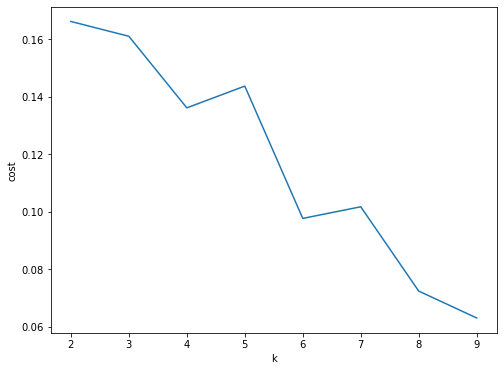

In [18]:
#Visualizing the silhouette scores in a plot
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1, figsize =(8,6))
ax.plot(range(2,10), silhouette_score)
ax.set_xlabel('k')
ax.set_ylabel('cost')

In [19]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
silhouette_score=[]

evaluator = ClusteringEvaluator(predictionCol='prediction', featuresCol='standardized', \
                                metricName='silhouette', distanceMeasure='cosine')
for i in range(2,10):
    
    KMeans_algo=KMeans(featuresCol='standardized', k=i)
    
    KMeans_fit=KMeans_algo.fit(data_scale_output)
    
    output=KMeans_fit.transform(data_scale_output)
    
    
    
    score=evaluator.evaluate(output)
    
    silhouette_score.append(score)
    
    print("Silhouette Score {}:".format(i),score)

Silhouette Score 2: 0.16350006984954188
Silhouette Score 3: 0.15981801634320147
Silhouette Score 4: 0.1365329890034634
Silhouette Score 5: 0.14312982565328214
Silhouette Score 6: 0.09973372826623297
Silhouette Score 7: 0.1037190779869893
Silhouette Score 8: 0.07004463169294525
Silhouette Score 9: 0.058481285025418814


From the silhouette_score, will go for k value 3 which is the local maxima.

In [20]:
# getting the clusters with k = 5
KMeans_algo = KMeans(featuresCol='standardized', k=3)
KMeans_fit = KMeans_algo.fit(data_scale_output)
clustered_by_kmeans = KMeans_fit.transform(data_scale_output)
evaluator.evaluate(clustered_by_kmeans)

0.15981801634320147

In [21]:
output.toPandas()

,age_imputed,bg2_lactate_imputed,basophils_imputed,eosinophils_imputed,lymphocytes_imputed,monocytes_imputed,neutrophils_imputed,albumin_imputed,aniongap_imputed,bicarbonate_imputed,bun_imputed,calcium_imputed,chloride_imputed,creatinine_imputed,glucose_imputed,sodium_imputed,potassium_imputed,inr_imputed,pt_imputed,ptt_imputed,hematocrit_imputed,hemoglobin_imputed,mch_imputed,mchc_imputed,mcv_imputed,platelet_imputed,rbc_imputed,rdw_imputed,wbc_imputed,scr_min_imputed,ckd_imputed,mdrd_est_imputed,scr_baseline_imputed,alt_imputed,alp_imputed,ast_imputed,bilirubin_total_imputed,charlson_comorbidity_index_imputed,gender,gender_imputed,features,standardized,prediction
0,59.30,1.6,0.4,1.3,19.7,5.9,73.0,3.9,16.0,26.0,20.0,8.9,102.0,1.0,140.0,142.0,4.2,1.1,12.5,29.2,36.3,12.1,33.6,33.6,101.0,228.0,3.60,12.6,15.2,1.0,0.0,1.07,1.00,20.0,71.0,23.0,0.5,7.0,M,1,"[59.3, 1.6, 0.4, 1.3, 19.7, 5.9, 73.0, 3.9, 16...","[3.0755758945513905, 3.5492276696480247, 2.235...",0
1,45.50,1.6,0.6,3.1,29.6,4.0,62.6,3.9,15.0,23.0,16.0,9.0,106.0,0.6,99.0,140.0,3.9,1.1,12.5,29.2,37.5,13.4,29.8,35.6,84.0,194.0,4.47,13.0,4.4,0.6,0.0,0.87,0.60,20.0,71.0,23.0,0.5,0.0,F,2,"[45.5, 1.6, 0.6, 3.1, 29.6, 4.0, 62.6, 3.9, 15...","[2.359843224318521, 3.5492276696480247, 3.3539...",3
2,66.45,1.1,0.1,0.8,5.6,2.6,90.9,2.9,18.0,27.0,19.0,8.7,101.0,0.7,192.0,135.0,5.0,1.4,14.9,27.1,36.9,12.6,32.8,35.5,95.0,272.0,3.93,14.0,18.5,0.7,0.0,0.81,0.70,16.0,93.0,18.0,0.7,3.0,F,2,"[66.45, 1.1, 0.1, 0.8, 5.6, 2.6, 90.9, 2.9, 18...","[3.4464084012300154, 2.440094022883017, 0.5589...",7
3,32.32,1.6,0.4,1.3,19.7,5.9,73.0,3.9,10.0,26.0,5.0,8.2,107.0,0.6,67.0,139.0,4.0,1.0,10.4,24.4,36.8,12.0,28.1,32.6,86.0,207.0,4.27,13.6,5.5,0.6,0.0,0.92,0.60,15.0,71.0,34.0,0.5,0.0,F,2,"[32.32, 1.6, 0.4, 1.3, 19.7, 5.9, 73.0, 3.9, 1...","[1.676266659559881, 3.5492276696480247, 2.2359...",1
4,84.21,4.3,0.4,1.3,19.7,5.9,73.0,3.2,15.0,24.0,22.0,9.6,107.0,1.3,90.0,137.0,5.0,1.1,13.4,28.4,36.2,12.9,32.5,35.7,92.0,304.0,4.00,13.6,9.1,1.3,0.0,1.01,1.01,20.0,71.0,23.0,0.5,5.0,M,1,"[84.21, 4.3, 0.4, 1.3, 19.7, 5.9, 73.0, 3.2, 1...","[4.36752522900797, 9.538549362179065, 2.235951...",5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63882,32.61,1.6,0.7,2.0,35.5,3.8,57.9,4.0,15.0,26.0,18.0,9.2,102.0,0.7,89.0,139.0,4.1,1.1,12.5,29.2,36.6,12.5,27.7,34.1,81.0,278.0,4.50,14.2,10.7,0.7,0.0,0.92,0.92,20.0,108.0,14.0,0.2,1.0,F,2,"[32.61, 1.6, 0.7, 2.0, 35.5, 3.8, 57.9, 4.0, 1...","[1.691307418572021, 3.5492276696480247, 3.9129...",3
63883,70.28,1.6,0.4,1.3,19.7,5.9,73.0,3.9,14.0,31.0,8.0,8.8,105.0,1.2,88.0,141.0,4.1,1.1,12.5,25.3,39.2,13.7,28.7,34.9,83.0,161.0,4.78,14.1,8.2,1.2,0.0,1.04,1.04,20.0,71.0,23.0,0.5,5.0,M,1,"[70.28, 1.6, 0.4, 1.3, 19.7, 5.9, 73.0, 3.9, 1...","[3.645050149562761, 3.5492276696480247, 2.2359...",8
63884,75.02,1.7,0.0,1.0,17.0,4.0,78.0,2.9,15.0,28.0,13.0,9.3,104.0,0.6,144.0,136.0,4.4,1.1,12.4,35.5,34.7,11.2,27.8,32.5,86.0,372.0,4.07,14.9,10.0,0.6,0.0,0.79,0.60,11.0,150.0,20.0,0.4,9.0,F,2,"[75.02, 1.7, 0.0, 1.0, 17.0, 4.0, 78.0, 2.9, 1...","[3.890888762381877, 3.771054399001026, 0.0, 1....",1
63885,52.18,1.6,0.4,1.3,19.7,5.9,73.0,3.9,15.0,25.0,15.0,9.7,105.0,0.9,103.0,141.0,3.9,1.0,10.9,41.9,42.1,14.9,33.0,35.3,94.0,164.0,4.50,12.9,9.3,0.9,0.0,1.10,0.90,20.0,71.0,23.0,0.5,2.0,M,1,"[52.18, 1.6, 0.4, 1.3, 19.7, 5.9, 73.0, 3.9, 1...","[2.706299328460229, 3.5492276696480247, 2.2359...",0


In [22]:
clustered_by_kmeans.groupby("prediction").count().toPandas()

,prediction,count
0,1,8309
1,2,29975
2,0,25603


#### bisect kmeans

In [23]:
from pyspark.ml.clustering import BisectingKMeans
for i in range(2,10):
    bkm = BisectingKMeans(featuresCol='standardized').setK(i).setSeed(1)
    model2 = bkm.fit(data_scale_output)

    predictions2 = model2.transform(data_scale_output)

    evaluator2 = ClusteringEvaluator()
    silhouette2 = evaluator.evaluate(predictions2)
    print("Silhouette with squared euclidean distance {} = ".format(i) + str(silhouette2))

Silhouette with squared euclidean distance 2 = 0.16350006984954188
Silhouette with squared euclidean distance 3 = 0.09145654359395142
Silhouette with squared euclidean distance 4 = 0.09981972324347244
Silhouette with squared euclidean distance 5 = 0.07325668433877972
Silhouette with squared euclidean distance 6 = 0.06971699205233081
Silhouette with squared euclidean distance 7 = 0.07450599830583976
Silhouette with squared euclidean distance 8 = 0.08277388034858384
Silhouette with squared euclidean distance 9 = 0.038141094977826535
